# CE - 88 Data Science for Smart Cities

**Due date: Monday, November 13th 11:59pm**

## Homework 3

### 1. Hidden Markov models (50 points)

For this problem, you will use a simple HMM with $Q = 3$ hidden states and a sequence length
of $T = 100$ trading days. The choice of a small $Q$ reduces the model complexity, which helps in
performing inference over the hidden states. You can roughly think of these hidden states as *bull
market*, *bear market*, and *stable market*. The emission model is a multinomial distribution
with $O = 5$ observed symbols. See Table below for details on the output states. 

<img src="table.png", width="400">


The parameters of this HMM have already been estimated using the EM algorithm on a much longer portion of
data (from 01/01/2010 to 07/31/2013), as follow:

parameters are:

- prior: the prior distribution over $Q_0$, where prior$(i) = p(Q_0 = i)$

<img src="prior.png", width="200">


- transition: the transition probability matrix, where transition$(i, j) = p(Q_{t+1} = j \mid Q_t = i)$

<img src="transition.png", width="300">


- emission: the emission probability matrix, where emission$(i, j) = p(O_t = j \mid Q_t = i)$

<img src="emission.png", width="400">



You will use this fully parameterized model to carry out inference over a sequence of 100 trading days (starting on 08/01/2013), and then you will perform forward prediction of the output values over the next 28 days. All of the data used in this problem was downloaded from Yahoo! finanace.

The sequence of 128 observations is given below as **Obs_seq**:

In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import hmms
%matplotlib inline

Obs_seq = np.array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 4, 3, 2, 2, 2, 1, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 3, 1, 4, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2])

**Part 1.** Given emission sequence of time $t = 1,...,100$, return probabilities that emission is generated by hidden states, for every time and every state. The algorithm is called Forward-Backward algorithm.

Here we are asked to find the following probability:

$p(Q_i \mid O_1,O_2,...,O_{100})$

After you find the probabilities, visualize them. 

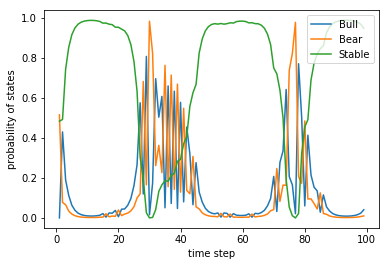

In [5]:
# Your analysis here:
Trans = np.array([[0.266,0.645,0.089],[0.500,0.498,0.002],[0.023,0.002,0.975]])
Emiss = np.array([[0.004,0.036,0.905,0.052,0.003],[0.118,0.237,0.251,0.222,0.172],[0.009,0.083,0.855,0.053,0.000]])
Pi = np.array([0,0.787,0.213])

dhmm = hmms.DtHMM(Trans,Emiss,Pi)

log_prob_table = dhmm.states_confidence( Obs_seq[0:99] )
p_state = np.exp(log_prob_table)

plt.plot(range(1,100),p_state[:,0], label = "Bull")
plt.plot(range(1,100),p_state[:,1], label = "Bear")
plt.plot(range(1,100),p_state[:,2], label = "Stable")
plt.ylabel('probability of states')
plt.xlabel('time step')
plt.legend(loc=1, ncol=1)

**Part 2.** Given emission sequence of time $t = 1,...,100$, return the most likely sequence of hidden states and its probability. The algorithm is called Viterbi algorithm.

Here we are asked to find the following the following:

$\text{arg}\max p(Q_1,Q_2,...,Q_{100} \mid O_1,O_2,...,O_{100})$

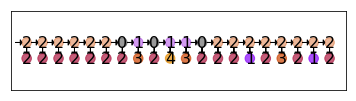

2.2634388170294413e-35

In [6]:
# Your analysis here:
(log_prob,s_seq) =  dhmm.viterbi( Obs_seq[0:99] )
hmms.plot_hmm( s_seq[20:40], Obs_seq[20:40] )
np.exp( log_prob )

**Part 3.** What is the probability of the observed sequence of time $t = 1,...,100$, given the model parameters?

Here we are asked to find the following the following:

$ p(O_1,O_2,...,O_{100} \mid T,E,P_0)$

In [7]:
# Your analysis here:
np.exp(dhmm.emission_estimate(Obs_seq[0:99]))


6.1398336061945422e-32

**Part 4.** What is the probability of the observed sequence and most probable hidden states of time $t = 1,...,100$, given the model parameters?

Here we are asked to find the following the following:

$ p((O_1,O_2,...,O_{100}), (Q_1,Q_2,...,Q_{100}) \mid T,E,P_0)$

In [8]:
# Your analysis here:
np.exp(dhmm.estimate(s_seq, Obs_seq[0:99]))


2.2634388170294413e-35

**Part 5.** Now, let's see how well this model performs. Predict the output symbols (observations) for time
points $t = 101,...,128$ by carrying out the following steps for each time point $t$:

- Run the forward algorithm to estimate $p(Q_{t} \mid O_{1},...,O_{t-1})$. 


- Compute $p(Q_t)$ from $p(Q_{t-1})$ using the transition matrix. Generate the output value
$O_t$ by sampling a state $q_t$ from $p(Q_t)$ and then from $p(O_t \mid Q_t = q_t)$.

- Compare your predictions with the ground truth observations at time points $t = 101,...,128$. What's the percentage of these values that your model predicts correctly? Report the average and standard deviation over 100 runs.

In [9]:
# Your analysis here:
p_state = np.zeros((128,3))

p_state[0,:] = np.dot(Pi,Trans) * Emiss[:,Obs_seq[0]]
p_state[0,:] = p_state[0,:] / sum(p_state[0,:])

for i in range(1,127):
    p_state[i,:] = np.dot(p_state[(i-1),:],Trans) * Emiss[:,Obs_seq[i]]
    p_state[i,:] = p_state[i,:] / sum(p_state[i,:])



In [10]:
est_obs = np.zeros((100,28))

for j in range(100):
    for i in range(1,29):
        p_ct = np.dot(p_state[(i+98),:],Trans)
        ct = np.random.choice([0,1,2],1,p = p_ct)
        p_ot = Emiss[ct,:]
        ot = np.random.choice([0,1,2,3,4],1,p = p_ot[0,:])
        est_obs[j,(i-1)] = ot

In [11]:
accuracy = np.zeros((1,100))
for i in range(100):
    accuracy[0][i] = np.sum(est_obs[i,:] == Obs_seq[99:127]) / 28

In [12]:
np.mean(accuracy), np.std(accuracy)

(0.69178571428571434, 0.065980632594353189)

### 2. Decision making (50 points)

<img src="graph.png", width="300">

This is the decision graph for the measurement of a strcuture.

The resistance $R$ is defined by two possible values: *Low* with probability 30% and *High* otherwise. 

The load $S$ is defined by two possible values: *High* with probability 30% and *Low* otherwise. 

The damage $D$ is defined by two possible values: *High* with probability 15% if $R =$ *Low* and $S =$ *Low*, with probability 50% if $R =$ *Low* and $S =$ *High*, with probability 0% if $R =$ *High* and $S =$ *Low*, with probability 10% if $R =$ *High* and $S =$ *High*, and *Low* otherwise.

The resistance is observed by $Y$, defined by two possible values: *High* with probability 95% if $R =$ *High*, with probability 5% if $R =$ *Low*, and *Low* otherwise. 



For parts 1 and 2, ignore the decision variable $A$ and utility variable $L$:

**Part 1. (15 points)** find probability $p(D = \textit{High})$


**Part 2. (10 points)** find probability $p(D = \textit{High} \mid Y = \textit{Low})$ and $p(D = \textit{High} \mid Y = \textit{High})$


Now imagine two actions $a$ are available: *Do Nothing (DN)* and *Repair (RE)*.

The expected loss is defined as following: $L(a = \textit{DN}, D = \textit{Low}) = 0$, $L(a = \textit{DN}, D = \textit{High}) = 100$, $L(a = \textit{RE}, D = \textit{Low}) = 20$, and $L(a = \textit{RE}, D = \textit{High}) = 25$. 


**Part 3. (20 points)** Identify the optimal action and corresponding loss without observing variable $Y$. Find corresponding values observing $Y =$ *Low* and $Y =$ *High*. 


**Part 4. (5 points)** Compute value of information for observing variable $Y$. 


**Refer to the pdf file for the solution**

### Bonus Question: Value of Information (10 points) 

Consider the following example: An oil company wants to buy the rights to drill in one of five blocks of land. It knows that exactly one block contains $\$8$ million worth of oil and all the other blocks contain $\$0$ worth of oil. You can take one or both of the following actions:


- Pay a seismologist $\$2.5$ million to survey one block of land and tell you with certainty whether it is oil rich or not.


- Pay a fortune teller $\$1$ million to tell you with certainty that the oil-rich block of land is one of two blocks.


Answer the following, justifying your answers with value of information calculations. For simplicity, you may write $\$1$ to mean $\$1$ million.


**(a)** Consider the approach where you choose the action whose value of information
minus cost is the greatest and repeat until no actions are left or all actions give negative
reward. What is the policy if the company uses this algorithm and what is the expected payoff?


**(b)** Now suppose the fortune teller rises his cost to $\$4.5$ million dollars. How do your answers to part (a) change?

**Part a**.

Let $S$ be the action of using the seismologist’s service and $F$ be the action of using the fortune teller’s service. If we use the seismologist, with probability $\frac{4}{5}$ she will not identify the oil-rich block, which means we will choose randomly from among the four remaining, and with probability $\frac{1}{5}$ she will identify the oil-rich block, which means you get that block with certainty. Thus:

$VoI(S) = \frac{4}{5} (\frac{1}{4} \times 8) + \frac{1}{5} \times 8 = 2$

Since we have to pay the seismologist $\$2.5$, we will not take this action! If we use the fortune teller, he will identify that the oil-rich block is one of two blocks, and we will choose randomly from among those. Thus:

$VoI(F) = \frac{1}{2} \times 8 = 4$

Since we only have to pay the fortune teller $\$1$, we will take this action. Now notice that since only two blocks remain after using the fortune teller, the seismologist will identify the oil-rich block with certainty, but recall that we already paid the fortune teller $\$1$. Thus:

$VoI(S \mid F) = 8 - 1 = 7$

Since we have to pay the seismologist only $\$2.5$, we will take this action. Thus the optimal policy is to take $S$ then $F$ and then purchase the unique block of land that was identified as being oil-rich. The expected payoff is $\$4.5$.


**Part b**.

In this case we would not take $F$ in the policy, since the cost is more than the value of information, and since we also wouldn’t take $S$, we will just choose to purchase a block of randomly, with an expected payoff of $\$0$. The optimal policy is still the same as before, with a payoff of $8 - 2.5 - 4.5 = 1$. 

# Load OKpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('HW3.ok')
_ = ok.auth(inline=True)

# Submit to OKpy

In [ ]:
_ = ok.submit()